# LGM Virtual Internship Program

## Task #1 : Develop a Neural Network That Can Read Handwriting

## Advance Level Project

## Dataset : https://www.kaggle.com/c/digit-recognizer/data?select=train.csv

# Name : Amaan Ali

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

### First I have imported the required libraries

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Then I have loaded the dataset from MNIST

In [3]:
objects = tf.keras.datasets.mnist
(training_images, training_labels), (test_images,test_labels) =  objects.load_data()

11501568/11490434 [==============================] - 308s 27us/step


In [4]:
print(training_images.shape)
print(training_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### The Images are read as a pixel

### And each Image pixels are in the range of 0 to 255

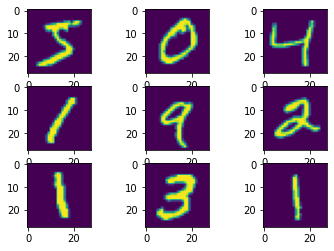

In [5]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(training_images[i])

In [6]:
print(training_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### Normalization (scaling in order to get each pixels in the range of 0 to 1)

In [7]:
training_images = training_images.astype("float") / 255.0
test_images = test_images.astype("float") / 255.0

In [8]:
from keras.utils import np_utils

training_labels = np_utils.to_categorical(training_labels, 10)     
test_labels = np_utils.to_categorical(test_labels, 10)

In [9]:
training_images[4]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
np.unique(training_labels)

array([0., 1.], dtype=float32)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Activation

In [12]:
# reshaping for cnn
training_images = np.array(training_images).reshape(-1,28,28,1)
test_images = np.array(test_images).reshape(-1,28,28,1)
print(training_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Building The Model

In [13]:
#creating the model
model = Sequential()

#adding the 1st convolutional layer 
model.add(Conv2D(64,(3,3), input_shape=training_images.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))  ## adding Dropout to avoid overfitting

#adding 2nd convolutional layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#adding the 3rd convolutional layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#adding flatten for Flattening the data to get 1d data
model.add(Flatten())

#adding 1st fully connected layer
model.add(Dense(64))
model.add(Activation('relu'))

#adding 2nd dense connected layer
model.add(Dense(32))
model.add(Activation('relu'))

#adding last dense connected layer
model.add(Dense(10))  # output must be equal to number of classes, so last dense  connected layer is equal to 10
model.add(Activation('softmax'))  ## activation function changed to softmax for class probabilities

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

### Compiling the Model

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
print(training_images.shape)
print(training_labels.shape)

(60000, 28, 28, 1)
(60000, 10)


### Model Fitting

In [17]:
np.random.seed(24)

model.fit(x=training_images,y=training_labels, epochs=30,validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 38s 28ms/step - loss: 0.4266 - accuracy: 0.8625 - val_loss: 0.1053 - val_accuracy: 0.9678
Epoch 2/30
1313/1313 [==============================] - 37s 28ms/step - loss: 0.1473 - accuracy: 0.9567 - val_loss: 0.0746 - val_accuracy: 0.9771
Epoch 3/30
1313/1313 [==============================] - 36s 28ms/step - loss: 0.1130 - accuracy: 0.9649 - val_loss: 0.0731 - val_accuracy: 0.9787
Epoch 4/30
1313/1313 [==============================] - 36s 28ms/step - loss: 0.0947 - accuracy: 0.9713 - val_loss: 0.0600 - val_accuracy: 0.9828
Epoch 5/30
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0838 - accuracy: 0.9739 - val_loss: 0.0501 - val_accuracy: 0.9849
Epoch 6/30
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0764 - accuracy: 0.9766 - val_loss: 0.0531 - val_accuracy: 0.9837
Epoch 7/30
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0689 - accuracy: 0.9788 - val_loss: 0.0494 -

### Evaluation of our Model

In [18]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels)
print('test loss on 10000 test sample:', test_loss)
print('test accuracy on 10000 test sample:', test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.0382 - accuracy: 0.9912
test loss on 10000 test sample: 0.0381527878344059
test accuracy on 10000 test sample: 0.9911999702453613


### Model Prediction

In [19]:
predictions = model.predict(test_images)
predictions

array([[2.6128095e-15, 2.2782608e-10, 2.4500764e-07, ..., 9.9999976e-01,
        7.0131475e-14, 1.4551731e-09],
       [6.1244867e-09, 8.0181863e-08, 9.9999976e-01, ..., 4.9331291e-08,
        1.8070356e-08, 8.5786017e-11],
       [2.7488012e-08, 9.9998999e-01, 3.7647985e-06, ..., 4.4403637e-06,
        2.4152837e-07, 4.0057195e-08],
       ...,
       [9.3181358e-18, 2.1458729e-14, 5.1697761e-16, ..., 2.0703852e-13,
        3.7237357e-12, 1.4380473e-09],
       [1.6775729e-07, 2.2178233e-08, 7.4570494e-07, ..., 8.0731610e-08,
        3.7265874e-08, 1.2781798e-06],
       [3.7331770e-08, 1.0650136e-07, 8.2834288e-11, ..., 3.6182074e-16,
        1.2274860e-08, 1.2979503e-09]], dtype=float32)

In [20]:
print(np.argmax(model.predict(test_images[range(33,40)]) ,axis=1))

[4 7 2 7 1 2 1]


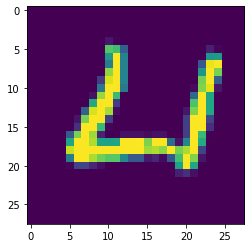

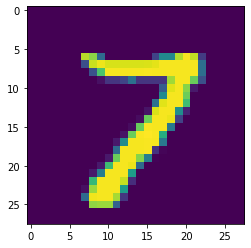

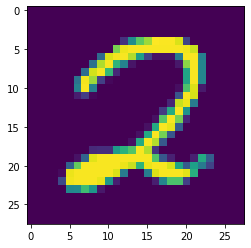

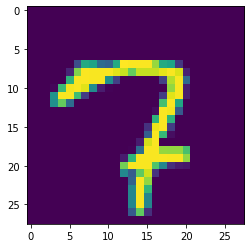

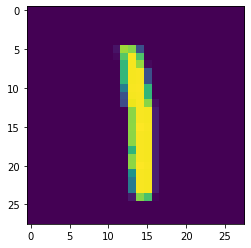

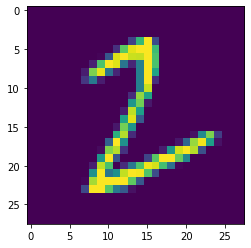

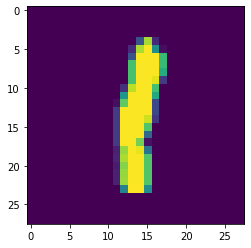

In [21]:
for i in range(33,40):
  plt.imshow(test_images[i].reshape(28,28))
  plt.show()